In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from scipy.optimize import brentq 

# Cohort survivorship difference between mutant and hypothetical wild type

### Figure not shown in paper

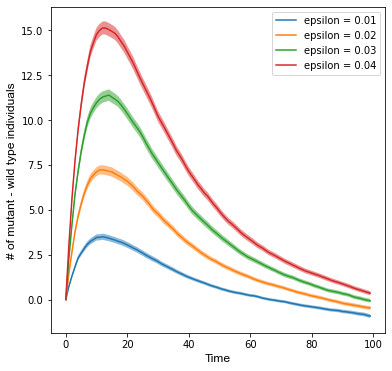

In [6]:
#Calculates the difference in number of survivors between hypothetical wild type and mutant across the time span 

Tmax = 100
nind = 1000
nrepeats = 1000 

alpha = 0.000222
kappa = 0.033

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt = 0.077

mut_W_all = np.zeros((4*nrepeats,Tmax))
hypwt_W_all = np.zeros((4*nrepeats,Tmax))
diff_mutwt = np.zeros((nrepeats,Tmax))

# Calculates relative temporal hazard rates (to be multiplied with p_wt later)
x = np.arange(0,Tmax,1,dtype = int)
beta = 0.8
y = 1.0 - beta*x/Tmax


C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

counter1 = 0
counter2 = 0

for m in range(4):
    mut_W = np.zeros((nrepeats,Tmax),dtype = int)
    hypwt_W = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt*y[j] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt*y[j]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        mut_W[k,:] = np.sum(s1, axis = 1)
        mut_W_all[counter1-1,:] = np.sum(s1, axis = 1) # to be used for fitness calculations in next snippet
    
        hypwt_W[k,:] = np.sum(s2, axis = 1)  # to be used for fitness calculations in next snippet
    
        diff_mutwt[k,:] = mut_W[k,:] - hypwt_W[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    ax.plot(C,mean_diff,label = f'epsilon = {epsilon[m]}')
    ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5) 

ax.legend()
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

#fig.tight_layout()

#figure = plt.gcf()
#figure.set_size_inches(3.42, 3.42)
#plt.savefig('RA_fig2_Homarus.pdf', dpi = 600, bbox_inches="tight");

# Figure 5 in paper

### R0 and r calculations for negative senescence

In [ ]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
                                                   

Tmax = 100
nind = 1000
nrepeats = 1000
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

sigma = 1 

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations hypothetical wild type           
R0_wt = np.zeros(nrepeats)
r_wt = np.zeros(nrepeats)

# Fecundity functions hypothetical wild type
fec_wt = np.zeros(Tmax)
x = np.arange(0,Tmax,1,dtype = int)
fec_wt = 1 + 4.0*x/Tmax

# Every fourth time point has a birth term
for i in range(0,Tmax):
    if(i % 4 != 0):
        fec_wt[i] = 0.0
#fec_wt = sigma*fec_wt #fec_wt goes from 1 to 5
m_wt = sigma*fec_wt #fec_wt goes from 1 to 5

#m_wt = np.zeros((4*nrepeats,Tmax))
#m_wt = np.zeros((nrepeats,Tmax))
#for s in range(4*nrepeats):
#for s in range(nrepeats):
    #m_wt[s,:] = fec_wt[:]

#f_wt = np.multiply(hypwt_W_all*(1/nind),m_wt)
f_wt = np.multiply(hypwt_W*(1/nind),m_wt)
#f_wt = hypwt_W*(1/nind) #normalize
#f_wt = f_wt*m_wt

# Calculate R0 and r for all instances
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

for i in range(nrepeats):
    R0_wt[i] = np.sum(f_wt[i,:])
    
    a, b = -2, 10
    f = f_wt[i,:]
    r = brentq(func, a, b)
    r_wt[i] = r


# Calculate mean, std and sem for R0 and r for nrepeats cases for hypothetical wildtype
mean_R0_wt = np.mean(R0_wt)
std_R0_wt = np.std(R0_wt)
sem_R0_wt = np.std(R0_wt)/math.sqrt(nrepeats)
mean_r_wt = np.mean(r_wt)
std_r_wt = np.std(r_wt)
sem_r_wt = np.std(r_wt)/math.sqrt(nrepeats)



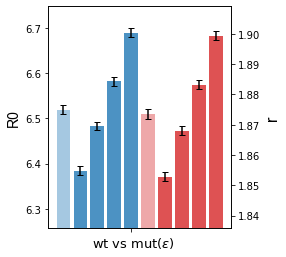

In [62]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
                                                   
Tmax = 100
nind = 1000
nrepeats = 1000

#  Hypothetical wild type @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations hypothetical wild type           
R0_wt = np.zeros(nrepeats)
r_wt = np.zeros(nrepeats)

# Fecundity functions hypothetical wild type
fec_wt = np.zeros(Tmax)
t = np.arange(0,Tmax,1,dtype = int)
fec_wt = 1 + 4.0*t/Tmax

# Every fourth time point has a birth term
for i in range(0,Tmax):
    if(i % 4 != 0):
        fec_wt[i] = 0.0

sigma = 1 
m_wt = sigma*fec_wt #fec_wt goes from 1 to 5
f_wt = np.multiply(hypwt_W*(1/nind),m_wt)  #hypwt_W is calculated in the snippet above

# Calculate R0 and r for all instances
x = np.linspace(1, int(Tmax), 1)
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

for i in range(nrepeats):
    R0_wt[i] = np.sum(f_wt[i,:])
    
    a, b = -2, 10
    f = f_wt[i,:]
    r = brentq(func, a, b)
    r_wt[i] = r


# Calculate mean, std and sem for R0 and r for nrepeats cases for hypothetical wildtype
mean_R0_wt = np.mean(R0_wt)
std_R0_wt = np.std(R0_wt)
sem_R0_wt = np.std(R0_wt)/math.sqrt(nrepeats)
mean_r_wt = np.mean(r_wt)
std_r_wt = np.std(r_wt)
sem_r_wt = np.std(r_wt)/math.sqrt(nrepeats)


# Mutant  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
R0_mut = np.zeros(4*nrepeats)
r_mut = np.zeros(4*nrepeats)
m_mut = np.zeros((4*nrepeats,Tmax))

mean_R0_mut = np.zeros(4)
std_R0_mut = np.zeros(4)
sem_R0_mut = np.zeros(4)
mean_r_mut = np.zeros(4)
std_r_mut = np.zeros(4)
sem_r_mut = np.zeros(4)

# Fecundity functions mutant
mu = 50.0
p_mut = np.zeros((Tmax))
fec_mut = np.ones((Tmax))
for j in range(0,Tmax):  
    fec_mut[j] = 1.0-mu*alpha*(((1+kappa)**(j+1))-1)
    fec_mut[j] = fec_wt[j]*fec_mut[j]

# Every fourth time point has a birth term
for i in range(0,Tmax):
    if(i % 4 != 0):
        fec_mut[i] = 0.0
fec_mut = sigma*fec_mut #fec_wt goes from 1 to 5

for s in range(4*nrepeats):
    m_mut[s,:] = fec_mut[:]
f_mut = np.multiply(mut_W_all*(1/nind),m_mut)


# Calculate R0 and r for all instances
for i in range(4*nrepeats):
    R0_mut[i] = np.sum(f_mut[i,:])
    
    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r
    

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(4):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)

    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Matplotlib's default ten color circles: {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}. This is the color used sequentially in matplotlib plots by default.
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html
#https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    
#Plotting figure
y1_pos = [0]
y2_pos = [1,2,3,4]
y3_pos = [5]
y4_pos = [6,7,8,9]
#y5_pos = [2,7]
#y5_pos = [0,2.5,5,7.5]
y5_pos = [4]
#y6_pos = [5]

#plt.figure(figsize=(6,6))
fig,ax1 = plt.subplots(figsize=(6,6))
afont = {'fontname':'Arial'}

ax1.bar(y1_pos,mean_R0_wt,yerr=sem_R0_wt, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');

ax1.set_ylabel('R0',fontsize=14,**afont);
ax1.set_ylim(0.96*mean_R0_wt,1.035*mean_R0_wt)

ax2 = ax1.twinx()

ax2.bar(y3_pos,mean_r_wt,yerr=sem_r_wt, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y4_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');

ax2.set_ylabel('r',fontsize=16,**afont);
ax2.set_ylim(0.98*mean_r_wt,1.019*mean_r_wt)

ax2.set_xticks(y5_pos);
xticks = [' wt vs mut($\epsilon$)']
ax1.set_xticklabels(xticks, fontsize=13);
#ax2.set_xticklabels(['wt','mutant($\epsilon$)','wt','mutant($\epsilon$)'],fontsize = 16);

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_PNAS_fig5_Homarus.pdf', dpi = 1200, bbox_inches="tight");

In [38]:
# Percentage difference in R0 when epsilon = 0.04
(mean_R0_mut[3] - mean_R0_wt)*100/mean_R0_wt

2.611956175018553

In [39]:
# Percentage difference in r when epsilon = 0.04
(mean_r_mut[3] - mean_r_wt)*100/mean_r_wt

1.3832382275856014